In [6]:
# Importações necessárias
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.metrics import accuracy_score
from IPython.display import Image
from six import StringIO
import pydotplus

# Carregar e limpar os dados
col_names = ['BI_RADS', 'age', 'shape', 'margin', 'density', 'severity']
df = pd.read_csv("sample_data/mammographic_masses.data.txt", names=col_names, header=None, na_values='?')
df.dropna(inplace=True)

# Exibir as primeiras linhas do DataFrame
print(df.head())

    BI_RADS   age  shape  margin  density  severity
0       5.0  67.0    3.0     5.0      3.0         1
2       5.0  58.0    4.0     5.0      3.0         1
3       4.0  28.0    1.0     1.0      3.0         0
8       5.0  57.0    1.0     5.0      3.0         1
10      5.0  76.0    1.0     4.0      3.0         1


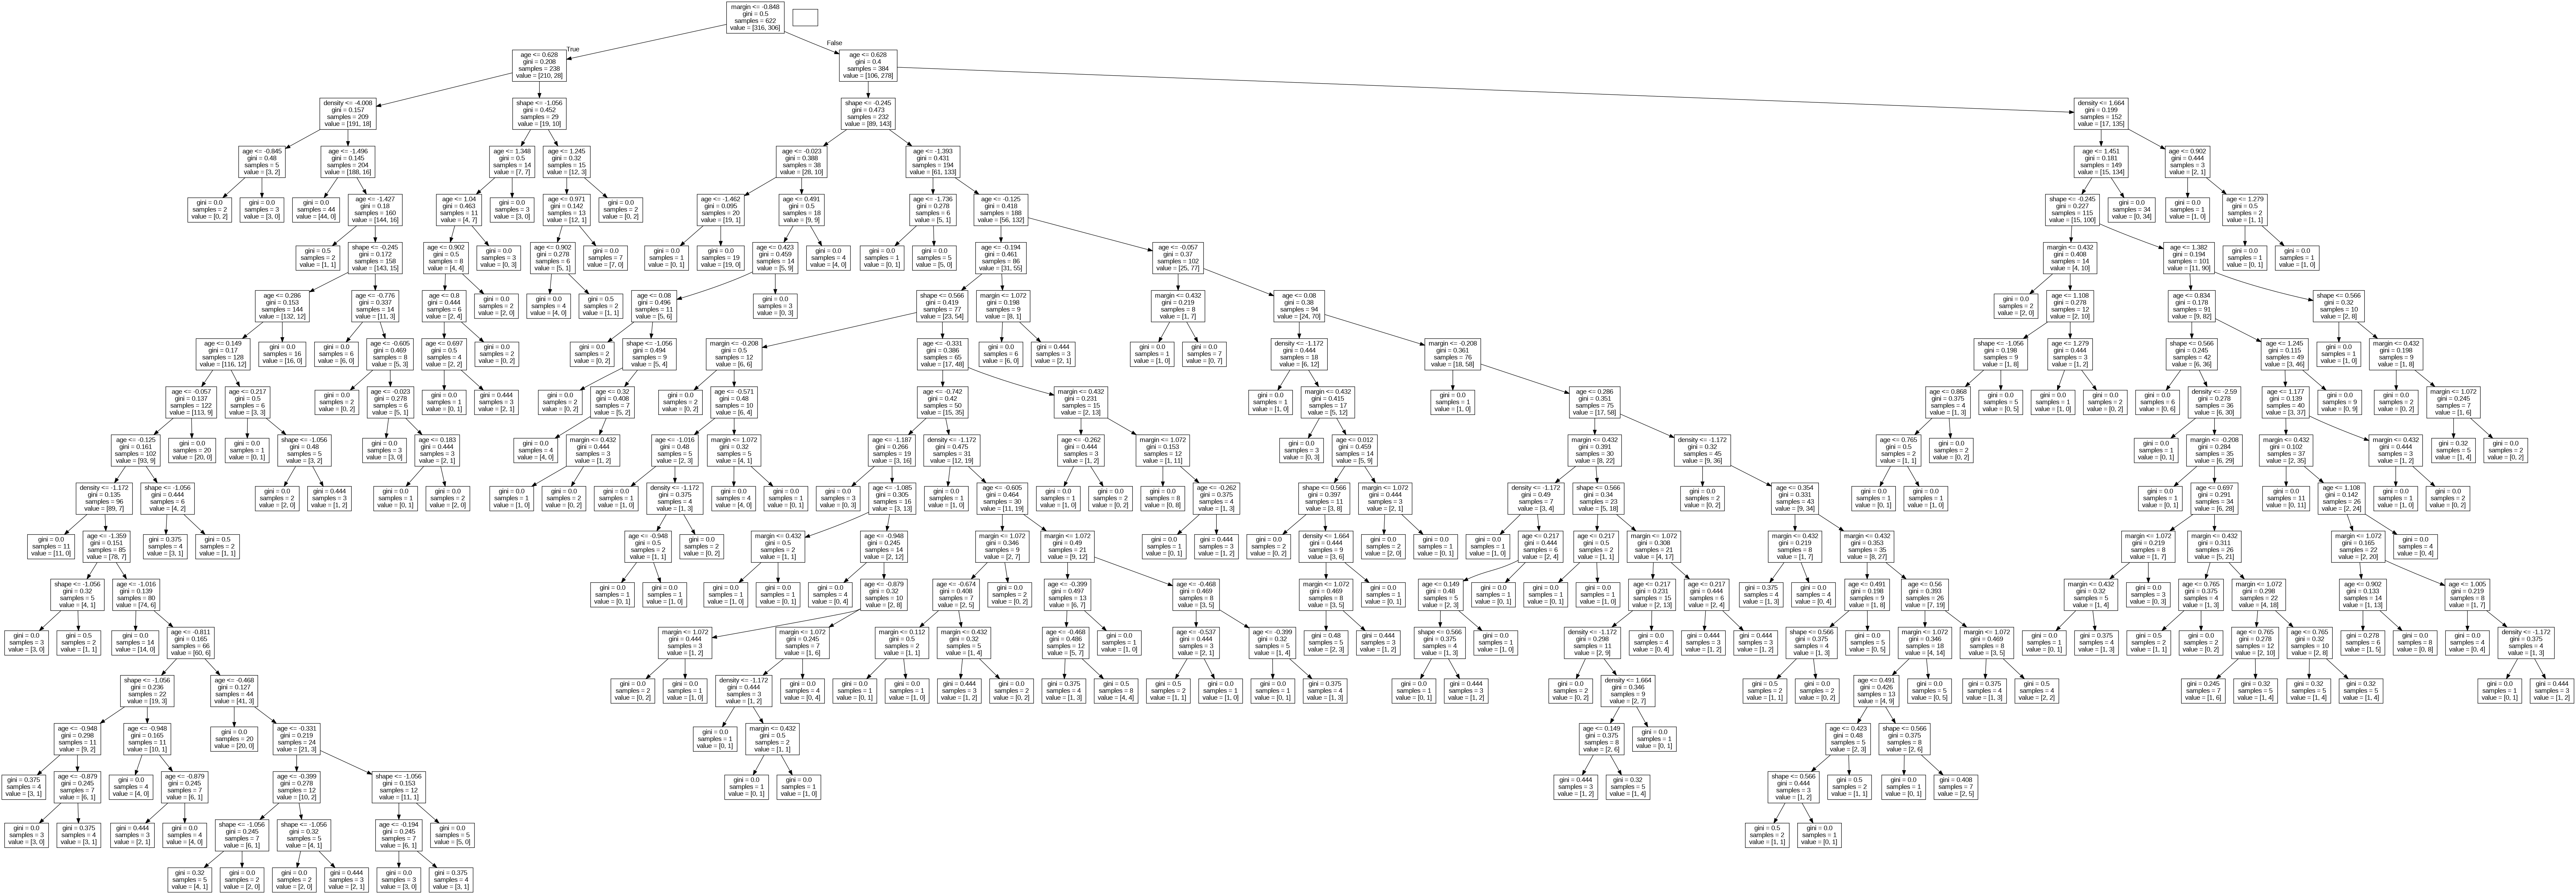

In [7]:
# Definir recursos e classes
features = ['age', 'shape', 'margin', 'density']
target = 'severity'

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.25, random_state=0)

# Escalar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Treinar o classificador
clf = tree.DecisionTreeClassifier()
clf.fit(X_train_scaled, y_train)

# Visualizar a árvore de decisão
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data, feature_names=features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [8]:
# Fazer previsões e calcular a precisão
predictions = clf.predict(X_test_scaled)
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.72
